# Airports Graph

#### Open Flights Dataset

https://openflights.org/data.html

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
import operator
import warnings
warnings.filterwarnings('ignore')

## Dataset

Read the airlines data

In [2]:
names=["Id", "Name", "City", "Country","IATA","ICAO","Latitude","Longitude","Altitude","Timezone","DST","Type","Source",""]
airports = pd.read_csv('data/airports.csv', names=names)
airports.head(5)

,Id,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Type,Source,
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [3]:
airports.groupby('Country').size()

Country
Afghanistan       22
Albania            5
Algeria           44
American Samoa     2
Angola            25
                  ..
West Bank          1
Western Sahara     3
Yemen             11
Zambia            13
Zimbabwe          16
Length: 237, dtype: int64

In [4]:
airports.Country.unique().size

237

In [5]:
routes = pd.read_csv('data/routes.csv', 
                     names=["Airline","AirlineID",
                            "Source","SourceId","Destination","DestinationId",
                            "Codeshare","Stops","Equipment"])
routes.head(5)

,Airline,AirlineID,Source,SourceId,Destination,DestinationId,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [6]:
routes = routes[["Source","Destination","Airline"]]
routes.head(5)

,Source,Destination,Airline
0,AER,KZN,2B
1,ASF,KZN,2B
2,ASF,MRV,2B
3,CEK,KZN,2B
4,CEK,OVB,2B


In [7]:
#filter down to US airports

In [8]:
airports = airports[airports['Country'] =='United States']
airports.head()

,Id,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Type,Source,
3212,3411,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001,2,-9,A,America/Anchorage,airport,OurAirports
3213,3412,Wainwright Air Station,Fort Wainwright,United States,\N,PAWT,70.613403,-159.860001,35,-9,A,America/Anchorage,airport,OurAirports
3214,3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001,16,-9,A,America/Anchorage,airport,OurAirports
3215,3414,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005,22,-9,A,America/Anchorage,airport,OurAirports
3216,3415,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004,38,-10,N,Pacific/Honolulu,airport,OurAirports


In [9]:
routes = routes[
    routes['Source'].isin(airports.IATA) &
    routes['Destination'].isin(airports.IATA)]
routes

,Source,Destination,Airline
172,ADQ,KLN,2O
177,KLN,KYK,2O
260,BRL,ORD,3E
261,BRL,STL,3E
262,DEC,ORD,3E
...,...,...,...
67565,SHR,DEN,ZK
67566,SOW,FMN,ZK
67567,SOW,PHX,ZK
67569,VIS,LAX,ZK


## Build Graph

In [10]:
edges = routes[['Source', 'Destination']].values
edges

array([['ADQ', 'KLN'],
       ['KLN', 'KYK'],
       ['BRL', 'ORD'],
       ...,
       ['SOW', 'PHX'],
       ['VIS', 'LAX'],
       ['WRL', 'CYS']], dtype=object)

In [11]:
#build graph from edges
g = nx.from_edgelist(edges, create_using=nx.DiGraph())

In [14]:
#number of nodes in the graph
g.number_of_nodes()

549

In [18]:
#number of nodes and edges
(g.number_of_nodes(), g.number_of_edges())

(549, 5450)

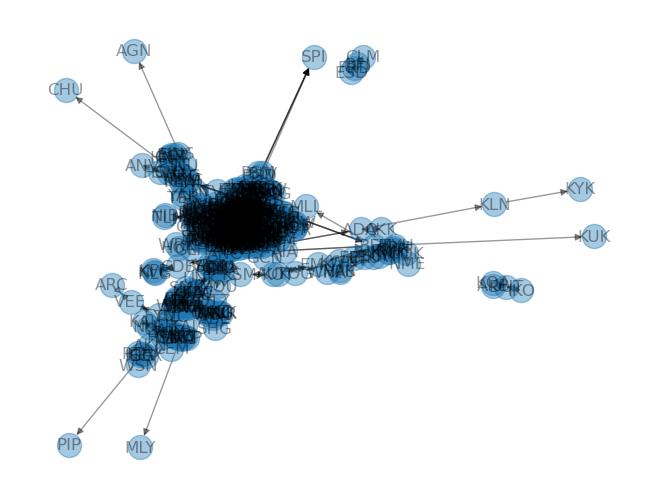

In [20]:
#plot the graph
nx.draw(g, pos=nx.spring_layout(g), with_labels=True, alpha=0.4)

## Graph Mining

In [23]:
#nodes with the highest degrees
sorted(g.degree(), key=lambda x: x[1], reverse=True)[:10]

[('ATL', 305),
 ('ORD', 295),
 ('DEN', 295),
 ('DFW', 274),
 ('MSP', 232),
 ('DTW', 227),
 ('LAS', 226),
 ('CLT', 218),
 ('IAH', 201),
 ('PHL', 173)]

In [29]:
#does a route exist between every two airports? 
#is every airport reachable from every other airport?

nx.is_strongly_connected(g), nx.is_connected(g.to_undirected())

(False, False)

### Connected components

In [30]:
#graph density
nx.density(g)

0.018115219443447277

In [31]:
#Connected Components
len(g.edges())/(len(g.nodes())*len(g.nodes())-1)

0.018082282680822827

In [32]:
#How many nodes are in the largest (in terms of nodes) weakly connected component?
comps=nx.connected_components(g.to_undirected())
for com in comps:
    print(com)

{'SNA', 'ANI', 'AZA', 'ACV', 'SHG', 'OGD', 'HYA', 'OWB', 'YAK', 'LGA', 'IRC', 'DIK', 'MUE', 'IAD', 'RIC', 'PIH', 'MEI', 'NIB', 'ATY', 'DFW', 'SBA', 'CID', 'LEB', 'RAP', 'SFB', 'TTN', 'RNO', 'OGG', 'WRG', 'BFL', 'CIC', 'RDD', 'RST', 'GRK', 'ELD', 'HRO', 'HPB', 'IRK', 'PHX', 'GJT', 'CRW', 'GSO', 'YUM', 'LEX', 'IGG', 'MIA', 'EMK', 'EWR', 'TUL', 'JLN', 'SEA', 'ORV', 'ISN', 'JFK', 'MOT', 'AKP', 'SBP', 'SMF', 'KTS', 'WMO', 'PRC', 'CLE', 'BTI', 'LNY', 'GRI', 'TUS', 'CAK', 'GAM', 'MWA', 'DEC', 'SRQ', 'BIS', 'ABE', 'SBN', 'PIA', 'LMA', 'WLK', 'SAF', 'ECP', 'EEK', 'FAI', 'OTZ', 'UIN', 'LYH', 'MBL', 'MKL', 'SJT', 'VPS', 'RKS', 'ANC', 'LAM', 'CYS', 'ABR', 'STC', 'KAL', 'JHW', 'LUR', 'CEZ', 'PLN', 'COD', 'BQK', 'DLG', 'SNP', 'APN', 'JST', 'ABY', 'JNU', 'SVA', 'BHB', 'CLL', 'KYK', 'CSG', 'LBF', 'ELV', 'TRI', 'ALO', 'GTF', 'BDL', 'MHT', 'KSM', 'OME', 'CGI', 'EAU', 'MLU', 'FLG', 'BGR', 'KVL', 'INL', 'CMX', 'WNA', 'IPL', 'DDC', 'DRO', 'HNL', 'AUS', 'HNH', 'HOB', 'SOW', 'SAV', 'HNM', 'BNA', 'PTU', 'AVL'

In [34]:
#How many nodes are in the largest (in terms of nodes) strongly connected component?
wccs = nx.weakly_connected_components(g)
x=len(max(wccs, key=len))
print(x)
print(x/len(g.nodes()))

541
0.9854280510018215


### Path Finding

In [35]:
#Is there route between Chicago and San Franscisco
nx.has_path(g, "ORD", "SFO")

True

In [36]:
#is there route from Chicago and Friday Harbor Airport (FRD)
nx.has_path(g, "ORD", "CPR")

True

In [37]:
#what is the shortest route between Chicago and San Franscisco
nx.shortest_path(g, "ORD", "SFO")

['ORD', 'SFO']

In [38]:
#what is the shortest route between Chicago and Casper-Natrona County International Airport(CPR)
nx.shortest_path(g, "ORD", "CPR")

['ORD', 'SLC', 'CPR']

### Degree

In [39]:
#Top airports with the most incoming flights
#nodes with the highest in-degrees

sorted(g.in_degree(), key=lambda x: x[1], reverse=True)[:10]

[('ATL', 152),
 ('DEN', 147),
 ('ORD', 146),
 ('DFW', 136),
 ('MSP', 116),
 ('LAS', 113),
 ('DTW', 113),
 ('CLT', 108),
 ('IAH', 100),
 ('PHL', 86)]

In [40]:
#Top airports with the most outgoing flights
#nodes with the highest out-degrees

sorted(g.out_degree(), key=lambda x: x[1], reverse=True)[:10]

[('ATL', 153),
 ('ORD', 149),
 ('DEN', 148),
 ('DFW', 138),
 ('MSP', 116),
 ('DTW', 114),
 ('LAS', 113),
 ('CLT', 110),
 ('IAH', 101),
 ('PHL', 87)]

In [41]:
#plot degree histogram
degrees = dict(g.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(g)) for i in degree_values]

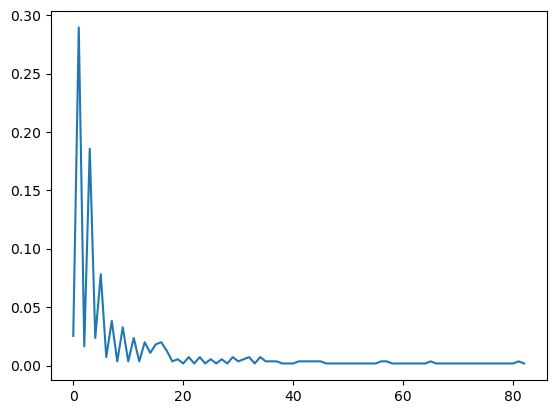

In [42]:
plt.plot(histogram)

## Centrality

### PageRank

In [52]:
#Top 5 airports by pagerank
sorted(nx.pagerank(g).items(), key=lambda x: x[1], reverse=True)[:5]

[('DEN', 0.02461240076267908),
 ('ATL', 0.02237874655417366),
 ('ORD', 0.02119369603517595),
 ('DFW', 0.020580191819304535),
 ('MSP', 0.01706830450620091)]

In [55]:
#Top 5 airports by in_degree_centrality
sorted(nx.in_degree_centrality(g).items(), key=lambda x: x[1], reverse=True)[:5]

[('ATL', 0.2773722627737226),
 ('DEN', 0.26824817518248173),
 ('ORD', 0.2664233576642336),
 ('DFW', 0.24817518248175183),
 ('MSP', 0.2116788321167883)]

In [56]:
#Top 5 airports by out_degree_centrality
sorted(nx.out_degree_centrality(g).items(), key=lambda x: x[1], reverse=True)[:5]

[('ATL', 0.27919708029197077),
 ('ORD', 0.2718978102189781),
 ('DEN', 0.27007299270072993),
 ('DFW', 0.25182481751824815),
 ('MSP', 0.2116788321167883)]

### Closeness Centrality

In [58]:
#Which airports will allow you to reach all other airports with the lowest average number of airports in between?
sorted(nx.closeness_centrality(g).items(), key=lambda x: x[1], reverse=True)[:5]

[('DEN', 0.49281216916476295),
 ('ORD', 0.48954232538831427),
 ('LAS', 0.4764457133622431),
 ('MSP', 0.4760065928890982),
 ('SEA', 0.46781445043901404)]

In [60]:
#Which airports will make you reach all other airports with the highest average number of airports in between?
sorted(nx.closeness_centrality(g).items(), key=lambda x: x[1], reverse=True)[:5]

[('DEN', 0.49281216916476295),
 ('ORD', 0.48954232538831427),
 ('LAS', 0.4764457133622431),
 ('MSP', 0.4760065928890982),
 ('SEA', 0.46781445043901404)]

### Betweenness Centrality

In [64]:
# Which airports often act as bridges between other pairs of airports?
sorted(nx.betweenness_centrality(g, normalized=True).items(), key=lambda x: x[1], reverse=True)[:5]

[('ANC', 0.29744738700248224),
 ('DEN', 0.14913832033656055),
 ('ORD', 0.12021012374703847),
 ('SEA', 0.11554567578910815),
 ('ATL', 0.0881872607172383)]

In [65]:
# Which airports least often act as bridges between other pairs of airports?
sorted(nx.betweenness_centrality(g, normalized=True).items(), key=lambda x: x[1], reverse=False)[:5]

[('KYK', 0.0), ('BRL', 0.0), ('DEC', 0.0), ('JBR', 0.0), ('MTM', 0.0)]

### Transitivity

In [8]:
# what is the transitivity and the average clustering coefficient of this graph